In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Spencer, Mrs. William Augustus (Marie Eugenie)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train_data.info()
print('-'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#fill Age NaN with the mean
train_data['Age'] = train_data['Age'].fillna(train_data.Age.mean())
test_data['Age'] = test_data['Age'].fillna(test_data.Age.mean())

#fill Cabin 0 
train_data['Cabin'] = train_data['Cabin'].fillna(0)
test_data['Cabin'] = test_data['Cabin'].fillna(0)

#fill Embarked and Fare with ffill
train_data['Embarked'] = train_data['Embarked'].fillna(method='ffill')
test_data['Fare'] = test_data['Fare'].fillna(method='ffill')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_data[['Survived','Sex']].groupby('Sex').agg(['sum','mean'])

Survived          
            sum      mean
Sex                      
female      233  0.742038
male        109  0.188908

<AxesSubplot:xlabel='Sex', ylabel='count'>

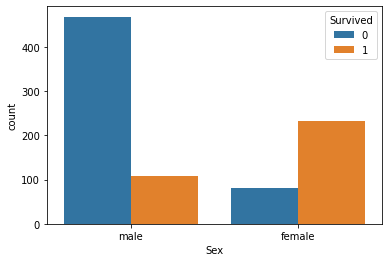

In [12]:
sns.countplot(x='Sex', data=train_data, hue='Survived')

In [13]:
train_data[['Survived','Pclass']].groupby('Pclass').agg(['sum','mean'])

Survived          
            sum      mean
Pclass                   
1           136  0.629630
2            87  0.472826
3           119  0.242363

<AxesSubplot:xlabel='Pclass', ylabel='count'>

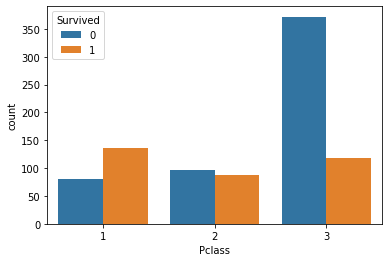

In [14]:
sns.countplot(x='Pclass', data=train_data, hue='Survived')

In [15]:
train_data[['Survived','SibSp']].groupby('SibSp').agg(['sum','mean'])

Survived          
           sum      mean
SibSp                   
0          210  0.345395
1          112  0.535885
2           13  0.464286
3            4  0.250000
4            3  0.166667
5            0  0.000000
8            0  0.000000

<AxesSubplot:xlabel='SibSp', ylabel='count'>

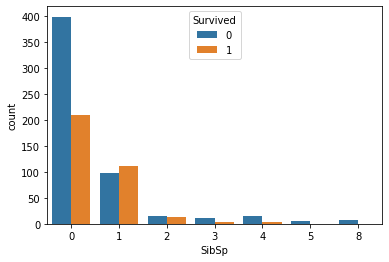

In [16]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')

In [17]:
train_data[['Survived','Parch']].groupby('Parch').agg(['sum','mean'])

Survived          
           sum      mean
Parch                   
0          233  0.343658
1           65  0.550847
2           40  0.500000
3            3  0.600000
4            0  0.000000
5            1  0.200000
6            0  0.000000

<AxesSubplot:xlabel='Parch', ylabel='count'>

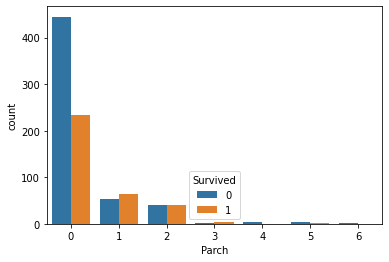

In [18]:
sns.countplot(x='Parch', data=train_data, hue='Survived')

In [19]:
train_data[['Survived','Embarked']].groupby('Embarked').agg(['sum','mean'])

Survived          
              sum      mean
Embarked                   
C              94  0.556213
Q              31  0.397436
S             217  0.336957

<AxesSubplot:xlabel='Embarked', ylabel='count'>

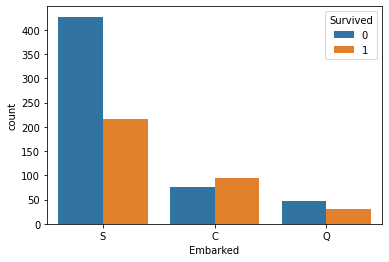

In [20]:
sns.countplot(x='Embarked', data=train_data, hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='count'>

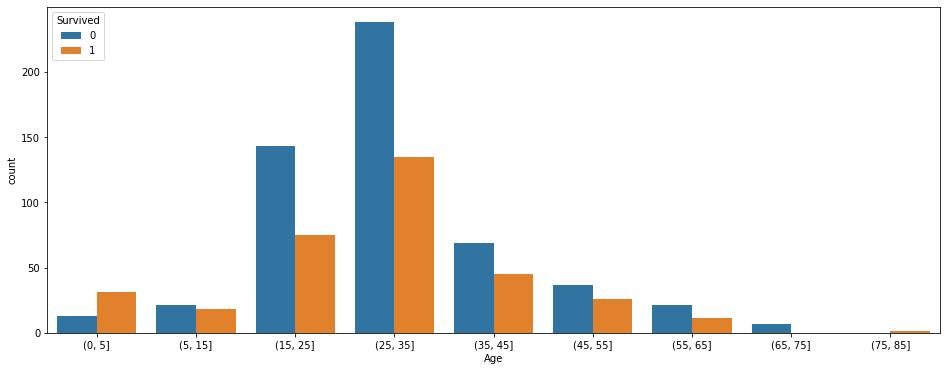

In [21]:
age_bins = pd.cut(x=train_data['Age'], bins=(0,5,15,25,35,45,55,65,75,85))
#age_bins.unique()
plt.figure(figsize=(16,6))
sns.countplot(x=age_bins, data=train_data, hue ='Survived')

In [22]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
test_data['Family'] = test_data['SibSp'] + test_data['Parch']
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C,1


In [23]:
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x:0 if x is 0 else 1)
test_data['Has_Cabin'] = test_data['Cabin'].apply(lambda x:0 if x is 0 else 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0


<AxesSubplot:xlabel='Has_Cabin', ylabel='count'>

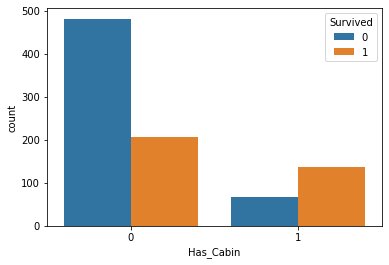

In [24]:
sns.countplot(x='Has_Cabin', data=train_data, hue='Survived')

In [25]:
train_data['Alone'] = train_data['Family'].apply(lambda x:0 if x is 0 else 1)
test_data['Alone'] = test_data['Family'].apply(lambda x:0 if x is 0 else 1)
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Has_Cabin,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,0,0,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S,4,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S,2,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C,1,0,1


<AxesSubplot:xlabel='Alone', ylabel='count'>

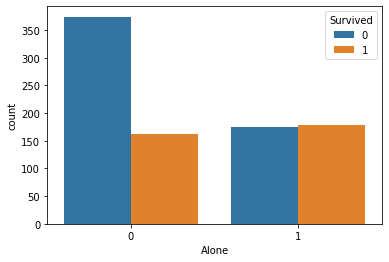

In [26]:
sns.countplot(x='Alone', data=train_data, hue='Survived')

In [27]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins=(0,5,18,40,60,85), labels=(0,1,2,3,4))
test_data['Age_group'] = pd.cut(test_data['Age'], bins=(0,5,18,40,60,85), labels=(0,1,2,3,4))
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Has_Cabin,Alone,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,1,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,0,0,0,2
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q,0,0,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,1,0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S,4,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S,2,0,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C,1,0,1,1


<AxesSubplot:xlabel='Age_group', ylabel='count'>

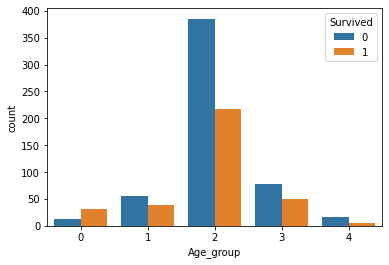

In [28]:
sns.countplot(x='Age_group', data=train_data, hue='Survived')

In [29]:
train_data['Gender'] = train_data['Sex'].map({'male':0, 'female':1})
test_data['Gender'] = test_data['Sex'].map({'male':0, 'female':1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Has_Cabin,Alone,Age_group,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,0,2,0


<AxesSubplot:>

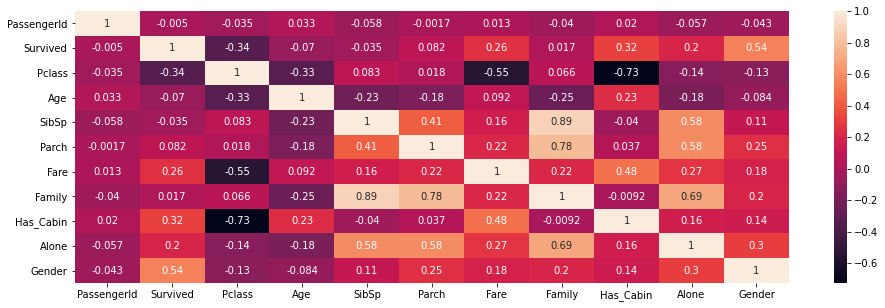

In [30]:
plt.figure(figsize=(16,5))
sns.heatmap(train_data.corr(), annot=True)

In [31]:
from sklearn.feature_selection import mutual_info_regression
feature = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family','Has_Cabin','Alone','Gender','Age_group']
XX = pd.get_dummies(train_data[feature])
yy = train_data['Survived']
mi_features = pd.get_dummies(feature)
def make_mi_scores(X,y,features):
    mi_scores = mutual_info_regression(X,y,discrete_features=features)
    mi_scores = pd.Series(mi_scores,name = 'MI scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

make_mi_scores(XX,yy,mi_features)

Age            0.199537
Sex_male       0.158583
Fare           0.133757
Gender         0.133094
Sex_female     0.109035
Family         0.050757
Has_Cabin      0.046085
Pclass         0.030827
Age_group_4    0.012023
Age_group_1    0.004561
SibSp          0.002607
Alone          0.000188
Parch          0.000000
Embarked_C     0.000000
Embarked_Q     0.000000
Embarked_S     0.000000
Age_group_0    0.000000
Age_group_2    0.000000
Age_group_3    0.000000
Name: MI scores, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
features = ['Pclass','Age','Fare','Embarked','Has_Cabin','Family','Alone','Gender','Age_group']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
rfval_pred = rfmodel.predict(X_val)
rf_accuracy = accuracy_score(rfval_pred, y_val)
rf_accuracy

0.8212290502793296

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
dtval_pred = dtmodel.predict(X_val)
dt_accuracy = accuracy_score(dtval_pred, y_val)
dt_accuracy

0.776536312849162

In [35]:
from sklearn.linear_model import LogisticRegression
lgmodel = DecisionTreeClassifier()
lgmodel.fit(X_train,y_train)
lgval_pred = lgmodel.predict(X_val)
lg_accuracy = accuracy_score(lgval_pred, y_val)
lg_accuracy

0.7653631284916201

In [36]:
from sklearn.model_selection import cross_val_score
rf_train_scores = -1 * cross_val_score(rfmodel, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error' )
print('CV train scores',rf_train_scores)
rf_scores = -1 * cross_val_score(rfmodel, X, y, cv=5, scoring = 'neg_mean_squared_error' )
print('CV scores',rf_scores)

CV train scores [0.18181818 0.1958042  0.19014085 0.19014085 0.25352113]
CV scores [0.22346369 0.21910112 0.15168539 0.24157303 0.16292135]


In [37]:
rfmodel.fit(X,y)
rfpredictions = rfmodel.predict(X_test)
predicted = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived':rfpredictions})
predicted

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
